In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv('../Resources/final_data.csv')
df.head()

,county,year,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,...,frm_15,points_15,median_hh_income,median_hh_inc_moe,poverty_count,poverty_count_moe,poverty_rate,poverty_rate_moe,county_fips,price
0,Atlantic,2019,0,0,0,0,0,0,0,0,...,3.391731,0.475,62678,2822,29057,4251,1.6,11.3,1,196067.42
1,Bergen,2019,2,0,2,0,0,46,2,44,...,3.391731,0.475,107971,3025,52980,7662,0.8,5.7,3,494018.42
2,Burlington,2019,0,0,0,0,0,0,0,0,...,3.391731,0.475,88443,3233,24961,4374,1.0,5.7,5,238593.67
3,Camden,2019,2,0,0,0,2,44,4,38,...,3.391731,0.475,73168,2374,53641,7048,1.4,10.7,7,181980.75
4,Cape May,2019,0,0,0,0,0,0,0,0,...,3.391731,0.475,66565,4753,8853,1981,2.2,9.8,9,389294.58


In [3]:
df.dropna(how='any', inplace = True)

In [4]:
df.dtypes

county                  object
year                     int64
violent_crime            int64
murder                   int64
rape                     int64
robbery                  int64
aggravated_assault       int64
property_crime           int64
burglary                 int64
larceny_theft            int64
motor_vehicle_theft      int64
arson                    int64
frm_30                 float64
points_30              float64
frm_15                 float64
points_15              float64
median_hh_income         int64
median_hh_inc_moe        int64
poverty_count            int64
poverty_count_moe        int64
poverty_rate           float64
poverty_rate_moe       float64
county_fips              int64
price                  float64
dtype: object

In [5]:
df.describe()

,year,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,...,frm_15,points_15,median_hh_income,median_hh_inc_moe,poverty_count,poverty_count_moe,poverty_rate,poverty_rate_moe,county_fips,price
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,2015.548780,45.243902,1.036585,1.804878,15.000000,27.402439,78.487805,19.475610,48.804878,10.207317,...,3.254108,0.553209,76257.286585,3172.719512,44146.487805,4914.469512,1.290244,10.117073,20.707317,298130.227134
std,2.297785,257.030067,6.735940,10.681604,86.123894,154.915640,448.818538,117.879498,268.929846,64.098513,...,0.326532,0.089556,18102.044916,1189.460973,33166.224140,2536.482615,0.449842,4.183676,12.146840,97335.378313
min,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.930769,0.450000,45438.000000,1241.000000,4793.000000,918.000000,0.700000,3.900000,1.000000,136466.170000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.049231,0.475000,61643.000000,2324.000000,17951.250000,3231.500000,0.900000,6.675000,11.000000,219140.397500
50%,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.272500,0.492308,74839.000000,2986.000000,38007.500000,4593.500000,1.200000,9.400000,21.000000,304646.500000
75%,2018.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.391731,0.576923,87302.250000,3830.000000,64436.000000,7148.250000,1.425000,13.025000,31.000000,379712.747500
max,2019.000000,1950.000000,57.000000,88.000000,732.000000,1106.000000,3260.000000,857.000000,1939.000000,504.000000,...,4.000192,0.700000,119731.000000,8348.000000,136161.000000,10428.000000,2.800000,20.100000,41.000000,494018.420000


In [6]:
# df["county"] = df["county"].astype('category')
# df["county_cat"] = df["county"].cat.codes
# df.head()

# linear regression without scaling

In [7]:
X = df.drop(["price", 'county'], axis=1)
y = df["price"]
print(X.shape, y.shape)

(164, 22) (164,)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()

In [10]:
lin_reg_model.fit(X, y)
print(lin_reg_model)

LinearRegression()


In [11]:
print('Weight coefficients: ', lin_reg_model.coef_)
print('y-axis intercept: ', lin_reg_model.intercept_) 

Weight coefficients:  [-1.40080975e+04  1.03143594e+04  3.73933571e+04 -5.35872815e+03
 -1.23360331e+04 -9.38423651e+03 -1.42863892e+03  1.74692316e+03
  1.39450376e+03 -4.57006583e+03 -2.72115837e+02  4.74405550e+04
  2.81716255e+05 -5.74916121e+04 -4.69115720e+05  6.34177103e+00
  2.41645647e+00  4.77806227e+00 -6.83885968e+00  2.44532216e+05
 -2.12053419e+04 -2.93285272e+02]
y-axis intercept:  27865763.076619633


In [12]:
print(f"Training Data Score: {lin_reg_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lin_reg_model.score(X_test, y_test)}")

Training Data Score: 0.7281242467339499
Testing Data Score: 0.7267303283230573


In [13]:
predictions = lin_reg_model.predict(X_test)
print(f"Predicted Labels: {predictions[:5]}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted Labels: [268574.54380416 129871.16709501 251344.27332443 164422.45740865
 352438.5039597 ]
Actual Labels: [224566.75, 137949.92, 310472.92, 165169.0, 394941.0]


In [14]:
import joblib
filename = '../Models/NJ_lin_reg.sav'
joblib.dump(lin_reg_model, filename)

['../Models/NJ_lin_reg.sav']

# linear regression with scaling

In [15]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X = df.drop(["price", 'county'], axis=1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# print(X.shape, y.shape)
# YOUR CODE HERE
# y_train.values.reshape(-1,1)
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train.values.reshape(-1,1))

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train.values.reshape(-1,1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1,1))

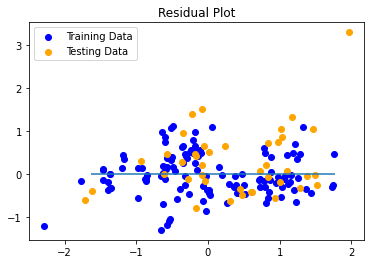

In [16]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
# YOUR CODE HERE
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6486380790504543, R2: 0.2972116165039286


In [18]:
from sklearn.linear_model import Lasso
reg_lasso = Lasso(alpha=.01)
reg_lasso.fit(X_train_scaled, y_train_scaled)
# YOUR CODE HERE
predictions_lasso = reg_lasso.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions_lasso)
r2 = model.score(X_test_scaled, y_test_scaled)
# YOUR CODE HERE

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.31775805436490606, R2: 0.2972116165039286


In [19]:
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha=.01)
reg_ridge.fit(X_train_scaled, y_train_scaled)
# YOUR CODE HERE
predictions_ridge = reg_ridge.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions_ridge)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6984431782462502, R2: 0.2972116165039286


In [20]:
from sklearn.linear_model import ElasticNet
reg_elasticnet = ElasticNet(alpha=.01)
reg_elasticnet.fit(X_train_scaled, y_train_scaled)
# YOUR CODE HERE
predictions_elasticnet = reg_elasticnet.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions_elasticnet)
r2 = model.score(X_test_scaled, y_test_scaled)
# YOUR CODE HERE

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3176614856126429, R2: 0.2972116165039286


# Observation
* It seems like our accuracy drops with scaling the data 